In [1]:
# 라이브러리 import
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import MultiLabelBinarizer
from wordcloud import WordCloud
import random
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 캐글 넷플릭스 데이터
path = '/content/drive/MyDrive/해커톤 1/넷플릭스/'
path_1 = path + 'netflix_titles.csv'
netflix = pd.read_csv(path_1)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# 다른 데이터들 불러오기
# 넷플릭스 오리지널
path_2 = path + 'NetflixOriginals.csv'
netflix_original = pd.read_csv(path_2, encoding='latin1')

#넷플릭스 오리지널 두번째 데이터셋
path_3= path + 'Netflix Original Content Dataset.csv'
netflix_original_2 = pd.read_csv(path_3, encoding='latin1')

# 넷플릭스 구독료
path_4 = path + 'Netflix subscription fee Dec-2021.csv'
netflix_cost = pd.read_csv(path_4, encoding='latin1')

# 넷플릭스 주가
path_5 = path + 'NFLX_stock_2002to2021.csv'
netflix_stock = pd.read_csv(path_5, index_col='Date', parse_dates=True, encoding='latin1')

# 디즈니플러스 데이터
path_6 = path + 'disney_plus_titles.csv'
disney = pd.read_csv(path_6)

# 디즈니플러스 주가
path_7 = path + 'DIS_stock_2019to2022.csv'
disney_stock = pd.read_csv(path_7, index_col='Date', parse_dates=True, encoding='latin1')
disney_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-11,114.040001,115.000000,114.029999,114.750000,113.364548,6952700
2019-03-12,114.720001,115.300003,114.040001,114.730003,113.344795,9920300
2019-03-13,114.839996,114.849998,113.720001,114.089996,112.712509,17994500
2019-03-14,114.120003,114.769997,113.930000,114.480003,113.097816,17409600
2019-03-15,114.500000,115.480003,113.680000,114.959999,113.572014,14932700


##경환파트

### 영상길이별(영화) 작품수

In [5]:
# 넷플릭스 데이터프레임에서 type이 'Movie'인 데이터만 분리
nm = netflix[netflix['type'] == 'Movie']
nm[['duration']]

,duration
0,90 min
6,91 min
7,125 min
9,104 min
12,127 min
...,...
8801,96 min
8802,158 min
8804,88 min
8805,88 min


In [6]:
# duration컬럼에서 영문자를 제외한다
nm['duration']=nm['duration'].str.replace(pat=r'[a-zA-Z]', repl= r'', regex=True)

In [7]:
# duration컬럼의 데이터를 string에서 float타입으로 변환
nm['duration'] = pd.to_numeric(nm['duration'])

In [8]:
nm[['duration']]

,duration
0,90.0
6,91.0
7,125.0
9,104.0
12,127.0
...,...
8801,96.0
8802,158.0
8804,88.0
8805,88.0


In [9]:
nm.describe()

,release_year,duration
count,6131.000000,6128.000000
mean,2013.121514,99.577187
std,9.678169,28.290593
min,1942.000000,3.000000
25%,2012.000000,87.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


In [10]:
nm.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [11]:
nm.dropna(inplace=True)

In [12]:
# plotly figure_factory를 통한 시각화
x1 = nm['duration']
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#db0000"])
fig.update_layout(title_text='Netflix movie duration Distribution')
fig.show()

####디즈니 영상길이별(영화) 작품수

In [13]:
# 디즈니 데이터프레임에서 type이 'Movie'인 데이터만 분리
dm = disney[disney['type'] == 'Movie']
dm[['duration']]

,duration
0,23 min
1,91 min
2,23 min
3,41 min
5,94 min
...,...
1445,108 min
1446,106 min
1447,107 min
1448,112 min


In [14]:
# duration컬럼에서 영문자를 제외한다
dm['duration']=dm['duration'].str.replace(pat=r'[a-zA-Z]', repl= r'', regex=True)

In [15]:
# duration컬럼의 데이터를 string에서 float타입으로 변환
dm['duration'] = pd.to_numeric(dm['duration'])

In [16]:
# plotly figure_factory를 통한 시각화
x1 = dm['duration']
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#0E3EDA"])
fig.update_layout(title_text='Disneyplus movie duration Distribution')
fig.show()

### 시즌길이별(TV쇼)작품수

In [17]:
# 넷플릭스 데이터프레임에서 type이 'TV Show'인 데이터만 분리
nt = netflix[netflix['type'] == 'TV Show']
nt[['duration']]

,duration
1,2 Seasons
2,1 Season
3,1 Season
4,2 Seasons
5,1 Season
...,...
8795,2 Seasons
8796,2 Seasons
8797,3 Seasons
8800,1 Season


In [18]:
# plotly.express로 시각화
fig = px.histogram(x=nt['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Netflix TV Show Seasons Distribution",
)
fig.show()

####디즈니 시즌길이별(TV쇼)작품수

In [19]:
# 디즈니 데이터프레임에서 type이 'TV Show'인 데이터만 분리
dt = disney[disney['type'] == 'TV Show']
dt[['duration']]

,duration
4,1 Season
6,1 Season
7,2 Seasons
8,2 Seasons
13,10 Seasons
...,...
1417,4 Seasons
1434,3 Seasons
1439,3 Seasons
1440,2 Seasons


In [20]:
# plotly.express로 시각화
fig = px.histogram(x=dt['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Disney TV Show Seasons Distribution",
)
fig.show()


### 연도별장르추이

In [21]:
# 넷플릭스 데이터프레임에서 'listed_in'컬럼을 복사해서 'genre'컬럼을 새로 만듦
netflix['genre'] = netflix['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
netflix['genre'].head()

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genre, dtype: object

In [22]:
# 결측치가 제거된 listed_in 시리즈를 listed_in 변수에 저장한다.
listed_in = netflix['listed_in'].dropna()
listed_in

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [23]:
genre = []

for idx, v in enumerate(listed_in):
    c = v.split(', ')
    genre.extend(c)

# 장르 별 고유 리스트를 만들어 준다.
genre = np.unique(genre)

# 총 장르 수 확인
len(genre)

42

In [24]:
# 각 장르 별 작품 수를 딕셔너리로 만들어 준다.
genre_dict = {g : len(netflix.index[netflix['listed_in'].notnull()][netflix['listed_in'].dropna().str.contains(pat = g)]) for g in genre}

# genre_dict 데이터 프레임으로 만들어 준다.
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns = ['number'])

# 작품 수가 Top 20인 장르들을 추려 본다.
genre_top_20 = genre_df.nlargest(20, 'number')

In [25]:
px.histogram(genre_top_20, x = genre_top_20.index, y = genre_top_20['number'], color = genre_top_20.index)

In [26]:
# 탑 장르 리스트 생성
top_genres = [
    'Movies',
    'Dramas',
    'International Movies',
    'Comedies',
    'TV Shows',
]

In [27]:
# 탑 장르 리스트에 해당 장르가 있는지 확인하여 반환하는 함수 생성
def check_popular_genre(genres):
    for genre in genres:
        if genre in top_genres:
            return True
    return False

In [28]:
# 'genre'컬럼을 이용해 'principal_genre' 생성
netflix['principal_genre'] = netflix['genre'].apply(lambda genres: genres[0])
netflix['principal_genre'].head()

0             Documentaries
1    International TV Shows
2            Crime TV Shows
3                Docuseries
4    International TV Shows
Name: principal_genre, dtype: object

In [29]:
# plotly.express의 sunburst그래프로 시각화
year_genre_df = netflix[(netflix['principal_genre'].isin(top_genres)) & (netflix['release_year'] >= 2017)].groupby(['principal_genre', 'release_year']).agg({'title': 'count'})
year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['principal_genre', 'release_year', 'count']

fig = px.sunburst(year_genre_df, path=['release_year', 'principal_genre'], values='count')
fig.show()

####디즈니 연도별장르추이

In [30]:
# 디즈니 데이터프레임에서 'listed_in'컬럼을 복사해서 'genre'컬럼을 새로 만듦
disney['genre'] = disney['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
disney['genre'].head()

0                [Animation, Family]
1                           [Comedy]
2        [Animation, Comedy, Family]
3                          [Musical]
4    [Docuseries, Historical, Music]
Name: genre, dtype: object

In [31]:
# 결측치가 제거된 listed_in 시리즈를 listed_in 변수에 저장한다.
listed_in = disney['listed_in'].dropna()
listed_in

0                                   Animation, Family
1                                              Comedy
2                           Animation, Comedy, Family
3                                             Musical
4                       Docuseries, Historical, Music
                            ...                      
1445        Action-Adventure, Family, Science Fiction
1446                 Action-Adventure, Comedy, Family
1447                      Biographical, Comedy, Drama
1448                     Buddy, Comedy, Coming of Age
1449    Action-Adventure, Animals & Nature, Animation
Name: listed_in, Length: 1450, dtype: object

In [32]:
genre = []

for idx, v in enumerate(listed_in):
    c = v.split(', ')
    genre.extend(c)

# 장르 별 고유 리스트를 만들어 준다.
genre = np.unique(genre)

# 총 장르 수 확인
len(genre)

44

In [33]:
# 각 장르 별 작품 수를 딕셔너리로 만들어 준다.
genre_dict = {g : len(disney.index[disney['listed_in'].notnull()][disney['listed_in'].dropna().str.contains(pat = g)]) for g in genre}

# genre_dict 데이터 프레임으로 만들어 준다.
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns = ['number'])

# 작품 수가 Top 20인 장르들을 추려 본다.
genre_top_20 = genre_df.nlargest(20, 'number')

In [34]:
px.histogram(genre_top_20, x = genre_top_20.index, y = genre_top_20['number'], color = genre_top_20.index)

In [35]:
# 탑 장르 리스트 생성
top_genres_disney = [
    'Family',
    'Animation',
    'Comedy',
    'Action-Adventure',
    'Animal & Nature',
]

In [36]:
# 탑 장르 리스트에 해당 장르가 있는지 확인하여 반환하는 함수 생성
def check_popular_genre(genres):
    for genre in genres:
        if genre in top_genres_disney:
            return True
    return False

In [37]:
# 'genre'컬럼을 이용해 'principal_genre' 생성
disney['principal_genre'] = disney['genre'].apply(lambda genres: genres[0])
disney['principal_genre'].head()

0     Animation
1        Comedy
2     Animation
3       Musical
4    Docuseries
Name: principal_genre, dtype: object

In [38]:
# plotly.express의 sunburst그래프로 시각화
year_genre_df = disney[(disney['principal_genre'].isin(top_genres_disney)) & (disney['release_year'] >= 2017)].groupby(['principal_genre', 'release_year']).agg({'title': 'count'})
year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['principal_genre', 'release_year', 'count']

fig = px.sunburst(year_genre_df, path=['release_year', 'principal_genre'], values='count')
fig.show()

### 한국작품분석

In [39]:
# 한국에서 만든 컨텐츠만 분리
korea_content = netflix[netflix['country'] == 'South Korea']
korea_content[['title']]

,title
104,Tayo the Little Bus
124,Pororo - The Little Penguin
289,The Crowned Clown
456,Her Private Life
545,YooHoo to the Rescue
...,...
8463,The President's Barber
8467,The Prison
8575,This Is My Love
8613,Train to Busan


In [40]:
# 전체 넷플릭스 컨텐츠 중 한국 컨텐츠의 비율 시각화
labels = ['Korea contents','Other contents']
values = [199,8804]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [41]:
# 한국 컨텐츠 중 영화만 분리
kor_movie = korea_content[korea_content['type'] == 'Movie']
kor_movie[['title']]

,title
556,The 8th Night
762,Sweet & Sour
1085,Night in Paradise
1342,Space Sweepers
1412,Wish You
1468,What Happened to Mr. Cha?
1643,The Call
2036,#Alive
2215,The Larva Island Movie
2410,The Witch: Part 1 - The Subversion


In [42]:
# 한국 컨텐츠 중 TV Show만 분리
kor_show = korea_content[korea_content['type'] == 'TV Show']
kor_show[['title']]

,title
104,Tayo the Little Bus
124,Pororo - The Little Penguin
289,The Crowned Clown
456,Her Private Life
545,YooHoo to the Rescue
...,...
8117,Suits
8257,The Cravings
8379,The Lady in Dignity
8575,This Is My Love


In [43]:
# 한국 컨텐츠에서 영화와 TV Show의 비율 시각화
labels = ['Korea Movies','Korea TV Shows']
values = [41,158]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [44]:
# 디즈니는 한국 컨텐츠가 없음
korea_content_dis = disney[disney['country'] == 'South Korea']
korea_content_dis[['title']]

,title


###워드클라우드로 넷플릭스와 디즈니플러스의 제목의 대략적인 개요 파악

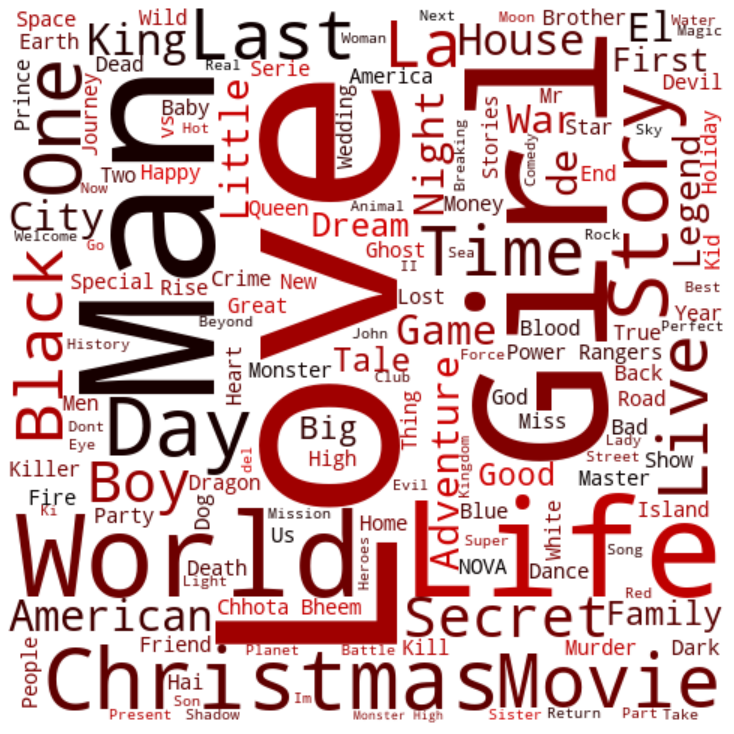

In [45]:
# 넷플릭스 wordcloud 생성
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#db0000', '#000000'])

text = str(list(netflix['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

mask = np.array(Image.open('/content/drive/MyDrive/해커톤 1/넷플릭스/netflix_logo.png'))

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

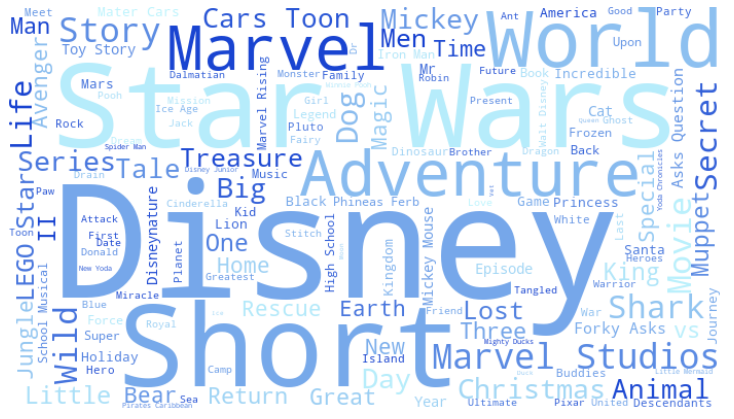

In [46]:
# 디즈니 wordcloud 생성
# Custom colour map based on Disney palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#113CCF', '#BFF5FD'])

text = str(list(disney['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

mask = np.array(Image.open('/content/drive/MyDrive/해커톤 1/넷플릭스/disney_logo.png'))

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()